1. Загрузите датасет CIFAR-10 или аналогичный из библиотеки
keras.datasets или torchvision.datasets.
• Выполните предварительную обработку данных: нормализация
изображений и преобразование классов в категориальный вид.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Нормализация данных (приведение значений пикселей к диапазону [0, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#Преобразование меток в one-hot encoding (бинарный вектор)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

2. Создание сверточной нейронной сети:
• Архитектура сети:
• Первый сверточный слой с фильтрами (3x3), активация ReLU.
• Пулинг-слой (2x2).
• Добавьте 2-3 сверточных слоя с последующими пулингами.
• Полносвязный слой с Softmax для классификации.
• Инициализация модели с использованием TensorFlow или PyTorch.

In [ ]:
#Сверточная нейронка
model = models.Sequential([
    # Первый сверточный блок
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Второй сверточный блок
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Полносвязные слои
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

model.summary()
# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

3. Обучение сети:
• Оптимизатор: Adam.
• Функция потерь: кросс-энтропия.
• Обучите сеть на 10-20 эпохах и сохраните результаты.

In [ ]:
#Обучение
history = model.fit(x_train, y_train,
                    epochs=6,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.3903 - loss: 1.6693 - val_accuracy: 0.5294 - val_loss: 1.2859
Epoch 2/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.5623 - loss: 1.2293 - val_accuracy: 0.5917 - val_loss: 1.1505
Epoch 3/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.6265 - loss: 1.0549 - val_accuracy: 0.6438 - val_loss: 1.0195
Epoch 4/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.6578 - loss: 0.9613 - val_accuracy: 0.6458 - val_loss: 1.0355
Epoch 5/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 80ms/step - accuracy: 0.6911 - loss: 0.8836 - val_accuracy: 0.6776 - val_loss: 0.9445
Epoch 6/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - accuracy: 0.7099 - loss: 0.8331 - val_accuracy: 0.6808 - val_loss: 0.9248


4. Визуализация:
• Графики изменения потерь и точности на обучающей и тестовой
выборках.
• Визуализация фильтров первого сверточного слоя.

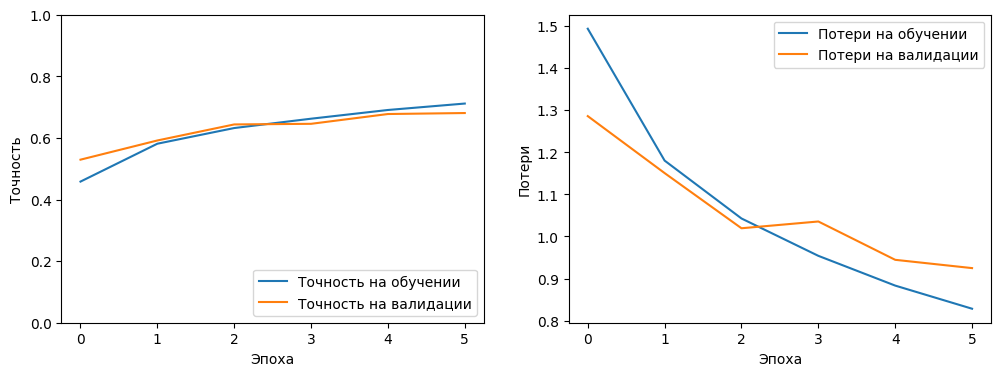

313/313 - 4s - 11ms/step - accuracy: 0.6808 - loss: 0.9248

Точность на тестовых данных: 0.6808


In [ ]:
#Визуализация результатов

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучении')
plt.plot(history.history['val_loss'], label='Потери на валидации')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend(loc='upper right')

plt.show()

# Оценка модели
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nТочность на тестовых данных: {test_acc:.4f}")

1. Параметры сети:
• Каждому студенту предоставляется уникальный набор параметров:
• Количество фильтров (32, 64, 128).
• Размеры фильтров (3x3, 5x5).
• Функции активации (ReLU, Sigmoid).
• Постройте сверточную сеть с предложенными параметрами и
обучите её на заданном датасете.

In [20]:
from tensorflow.keras import layers, models, datasets

#Загрузка данных CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

#Нормализация данных
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#Преобразование меток в one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#Функция для создания модели с заданными параметрами
def create_model(filters=32, kernel_size=(3,3), activation='relu'):
    model = models.Sequential([
        layers.Conv2D(filters, kernel_size, activation=activation, input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(filters*2, kernel_size, activation=activation),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(filters*2, kernel_size, activation=activation),

        layers.Flatten(),
        layers.Dense(64, activation=activation),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

#Параметры для экспериментов
params_combinations = [
    {'filters': 32, 'kernel_size': (3,3), 'activation': 'relu'},
    {'filters': 64, 'kernel_size': (3,3), 'activation': 'relu'},
    {'filters': 128, 'kernel_size': (3,3), 'activation': 'relu'}
]

#Обучение и оценка моделей
histories = []
for params in params_combinations:
    print(f"\nTraining model with: {params}")
    model = create_model(**params)
    history = model.fit(x_train, y_train,
                        epochs=6,
                        batch_size=64,
                        validation_data=(x_test, y_test),
                        verbose=1)
    histories.append((params, history))


Training model with: {'filters': 32, 'kernel_size': (3, 3), 'activation': 'relu'}
Epoch 1/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 85ms/step - accuracy: 0.3309 - loss: 1.8003 - val_accuracy: 0.4967 - val_loss: 1.4320
Epoch 2/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.5383 - loss: 1.2897 - val_accuracy: 0.5811 - val_loss: 1.2055
Epoch 3/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.6169 - loss: 1.0947 - val_accuracy: 0.6294 - val_loss: 1.0728
Epoch 4/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.6524 - loss: 0.9894 - val_accuracy: 0.6591 - val_loss: 0.9871
Epoch 5/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.6837 - loss: 0.9042 - val_accuracy: 0.6696 - val_loss: 0.9425
Epoch 6/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.7015 - loss: 0.8547 - val_accuracy: 0.6770 - val_loss: 0.9320

Training model with: {'filters': 64, 'kernel_size': (3, 3), 'activation': 'relu'}
Epoch 1/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 170s 215ms/step - acc

2. Анализ моделей:
• Сравните результаты обучения при изменении параметров сети
(фильтры, размер свёрток).
• Проанализируйте, как параметры влияют на переобучение и
точность на тестовой выборке.

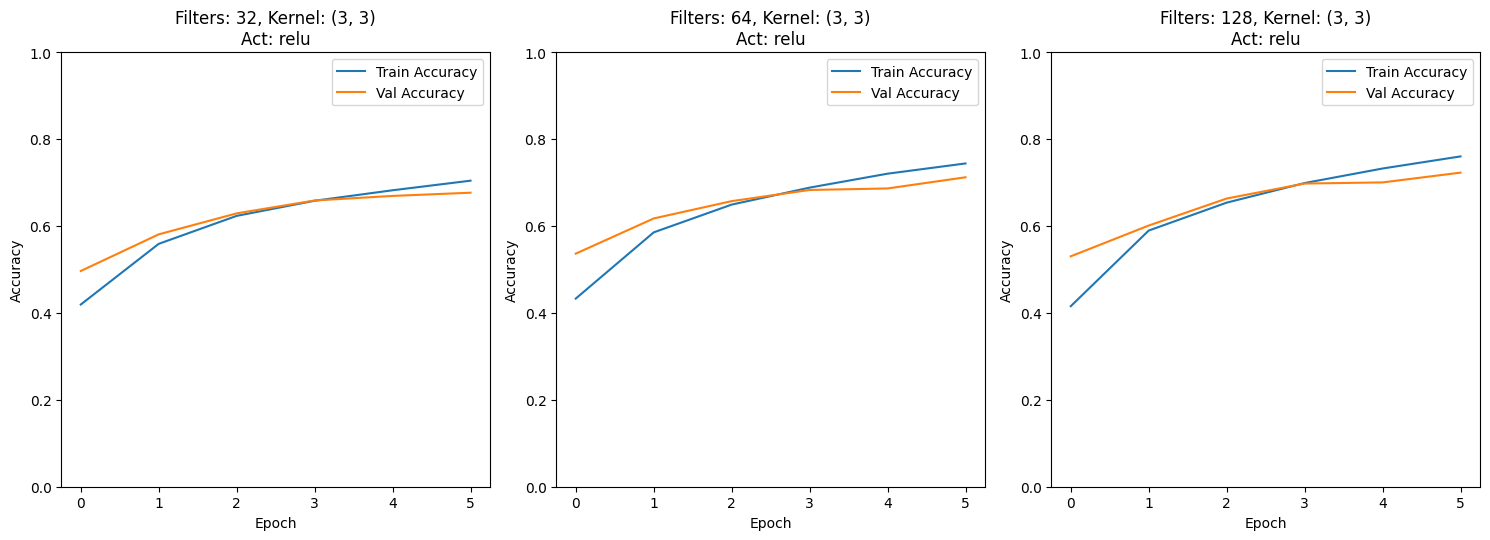


Сравнение моделей:
Filters    Kernel     Activation Train Accuracy  Val Accuracy   
32         (3, 3)     relu       0.7047          0.6770         
64         (3, 3)     relu       0.7444          0.7125         
128        (3, 3)     relu       0.7606          0.7232         


In [21]:
#Визуализация результатов
plt.figure(figsize=(15, 10))

for i, (params, history) in enumerate(histories):
    # График точности
    plt.subplot(2, 3, i+1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f"Filters: {params['filters']}, Kernel: {params['kernel_size']}\nAct: {params['activation']}")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.ylim([0, 1])
plt.tight_layout()
plt.show()

#Сравнение итоговых метрик
print("\nСравнение моделей:")
print("{:<10} {:<10} {:<10} {:<15} {:<15}".format(
    'Filters', 'Kernel', 'Activation', 'Train Accuracy', 'Val Accuracy'))
for params, history in histories:
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    print("{:<10} {:<10} {:<10} {:<15.4f} {:<15.4f}".format(
        params['filters'],
        str(params['kernel_size']),
        params['activation'],
        train_acc,
        val_acc))

1. Защитите свою модель, представив основные результаты:
• Итоговые метрики (точность, F1-мера).
• Влияние архитектурных параметров на обучение и переобучение.

In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

# Создаем список для хранения результатов
results = []

# Классы CIFAR-10 для отображения
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

for params, history in histories:
    # Получаем модель из истории обучения
    model = history.model

    # Предсказания на тестовых данных
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Вычисляем метрики
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    f1 = f1_score(y_true, y_pred_classes, average='macro')
    precision = precision_score(y_true, y_pred_classes, average='macro')
    recall = recall_score(y_true, y_pred_classes, average='macro')

    # Анализ по классам (точность для худшего класса)
    class_report = classification_report(y_true, y_pred_classes, target_names=class_names, output_dict=True)
    worst_class = min(class_report.items(), key=lambda x: x[1]['precision'] if isinstance(x[1], dict) else x[1])

    # Добавляем в результаты
    results.append({
        'Фильтры': params['filters'],
        'Размер ядра': f"{params['kernel_size'][0]}x{params['kernel_size'][1]}",
        'Активация': params['activation'],
        'Точность (train)': f"{train_acc:.4f}",
        'Точность (val)': f"{val_acc:.4f}",
        'F1-мера (val)': f"{f1:.4f}",
        'Precision (val)': f"{precision:.4f}",
        'Recall (val)': f"{recall:.4f}",
        'Переобучение (train-val)': f"{(train_acc - val_acc):.2%}",
        'Худший класс': worst_class[0],
        'Точность худшего класса': f"{worst_class[1]['precision']:.4f}" if isinstance(worst_class[1], dict) else f"{worst_class[1]:.4f}",
        'Время эпохи (с)': f"{np.mean(history.history['time']):.1f}" if 'time' in history.history else 'N/A'
    })

# Создаем DataFrame
results_df = pd.DataFrame(results)

results_df

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step


,Фильтры,Размер ядра,Активация,Точность (train),Точность (val),F1-мера (val),Precision (val),Recall (val),Переобучение (train-val),Худший класс,Точность худшего класса,Время эпохи (с)
0,32,3x3,relu,0.7047,0.6770,0.6781,0.6925,0.6770,2.77%,cat,0.4872,N/A
1,64,3x3,relu,0.7444,0.7125,0.7070,0.7165,0.7125,3.19%,dog,0.5727,N/A
2,128,3x3,relu,0.7606,0.7232,0.7200,0.7210,0.7232,3.74%,cat,0.5986,N/A


2. Используйте инструменты интерпретации (например, Grad-CAM) для
визуализации важных областей изображений, на которые обращала внимание
сеть.

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step


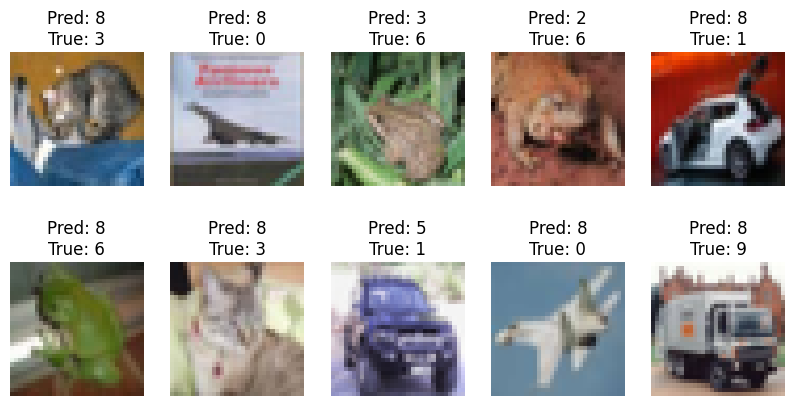

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Получаем предсказания модели
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Преобразуем в классы
y_true_classes = np.argmax(y_test, axis=1)  # Истинные классы

# Находим индексы неверных предсказаний
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

# Визуализируем несколько ошибок
num_images = 10  # Количество изображений для показа
plt.figure(figsize=(10, 5))

for i, idx in enumerate(incorrect_indices[:num_images]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"Pred: {y_pred_classes[idx]}\nTrue: {y_true_classes[idx]}")
    plt.axis("off")

plt.show()
